# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Indicadores Técnicos em uma Estratégia o Maior Decil de Volatilidade

Neste notebook, você aplicará a análise técnica não em ações individuais ou índices de mercado, mas em uma carteira personalizada que se baseia nos decis de volatilidade, ou seja, dividindo as ações de acordo com sua volatilidade em 10 subconjuntos iguais. O decil de maior volatilidade será selecionado para a criação de uma estratégia de negociação. Você então aplicará o indicador de média móvel e o indicador de breakout para gerar sinais de negociação e criar uma estratégia. Você criará um sinal de negociação exclusivo mesclando os dois indicadores e comparando o desempenho das três estratégias baseadas em indicadores.


Depois de completar essa lição, você será capaz de
1. Leia os dados de um arquivo CSV
2. Use propriedades de data e hora
3. Classifique as ações de acordo com o desvio padrão de seus retornos diários
4. Implemente dois indicadores: média móvel e indicador de breakout
5. Calcule os Retornos da estratégia
6. Plote os retornos e drawdowns da estratégia
s and drawdowns


Neste notebook, você executará as seguintes etapas:

1. [Leia os dados](# ler)
2. [Calcule o desvio padrão](# std)
3. [Portfólio de decil de volatilidade superior](# classificação)
4. [Forme o portfólio](# portfólio)
5. [Sinal de negociação e análise de desempenho](# analyse_SMA) <BR>
    4.1 [Média Móvel](# analyse_SMA) <BR>
    4.2 [Indicador de breakout](# analyse_breakout) <BR>
    4.3 [Mesclando os dois indicadores](# analyse_SMA_breakout) <BR>
6. [Ajustar o código](# ajustar)
    
    
<a id='read'> </a>
## Leia os dados
Os dados de preço das ações do S&P500 estão armazenados no arquivo CSV. Para ler um arquivo CSV, você pode usar o método `read_csv` do` pandas`. A sintaxe é mostrada abaixo.

Sintaxe:
`` `python
import pandas as pd
pd.read_csv (nome do arquivo, index_col)
`` `
1. ** filename **: nome do arquivo no formato de string
2. ** index_col **: o número da coluna para definir como índice

Esses dados estão disponíveis na unidade para download deste curso na última seção. Você também pode baixar os dados de preços em finance.yahoo.com.

Você então usará a função `pct.change ()` para calcular os retornos diários de todas as ações do S&P500.

In [1]:
## -------- Importe as bibliotecas necessárias -------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd

## -------- Leia os dados -------------
# Os dados são armazenados no diretório 'data'
path = '../data_modules/'
data = pd.read_csv(path +'price_data_2018_2020.csv',index_col=0)
# Converta a data para formato de data e hora
data.index = pd.to_datetime(data.index)
# Calcule as variações percentuais diárias dos preços
data_pc = data.pct_change()
data_pc.tail(2)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-13,-0.038157,-0.017484,-0.017577,-0.029745,-0.025415,0.019654,-0.017913,-0.029390,-0.042249,-0.068966,...,-0.024028,-0.012417,-0.090533,-0.022744,-0.014559,-0.042381,-0.030930,-0.022185,-0.054617,-0.007903
2020-05-14,-0.000955,-0.004123,0.012040,-0.007166,-0.005580,-0.009638,-0.008841,0.044653,0.015850,0.018088,...,0.019930,0.002411,0.001301,0.029487,0.012713,0.035430,-0.005872,0.009273,0.046750,0.024384


<a id='std'></a>
## Calcule o desvio padrão

Você irá calcular o desvio padrão da mudança percentual diária usando a função `std ()`. O desvio padrão é a propagação da distribuição de dados em um determinado conjunto de dados.

! [desvio padrão] (https://d2a032ejo53cab.cloudfront.net/Glossary/CJVPyHpX/stddev.PNG)

Onde
1. xi = observações individuais na população
2. μ = média das observações
3. N = número de observações

Anualizaremos o desvio padrão e o expressaremos como uma porcentagem para nos ajudar a comparar a volatilidade das ações.

In [2]:
# Calcule o desvio padrão
data_std = data_pc.loc[:'2018-12-31'].std()*(252**0.5)*100
data_std.tail()

YUM     19.627587
ZBRA    40.399247
ZBH     23.342641
ZION    25.028016
ZTS     23.517628
dtype: float64

<a id='sorting'></a>
## Os maiores decis do portfólio de volatilidade

1. Classifique as ações por volatilidade
2. Selecione o top 10% das ações

Os seguintes métodos / propriedades são usados

1. `sort_values ​​()`: uma função para classificar ações de acordo com o desvio padrão dos retornos percentuais diários.
2. `len`: retorna o número de linhas no dataframe.
3. `plot.bar`: plota o gráfico de barras.
4. `ylim`: para definir os valores do eixo y.
5. `mostrar`: para exibir o gráfico.

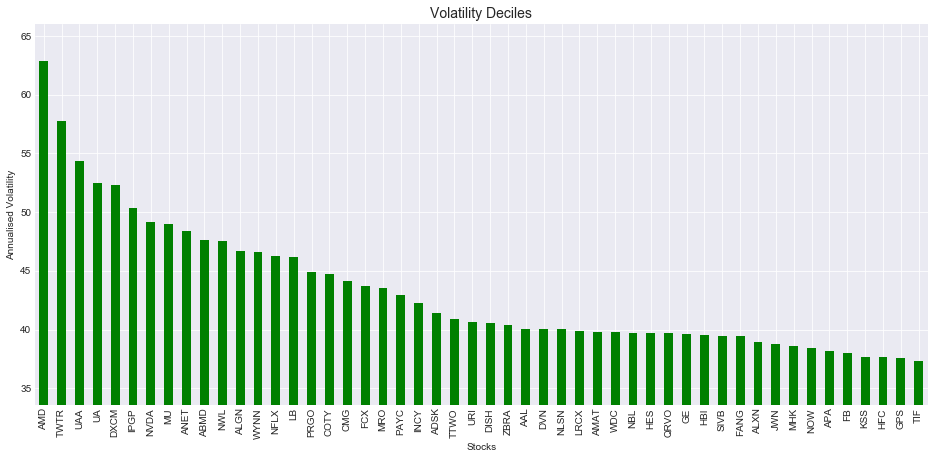

In [3]:
vol_sorted = data_std.sort_values(ascending=False)
top_decile = vol_sorted[:int(len(data_std)*0.1)]
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min()*0.9)
plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

<a id='portfolio'></a>
## Criando o portfolio
1. Obtenha os dados das ações de 2019 em diante. Queremos separar o período usado para cálculo de volatilidade e cálculos de retornos de estratégia. Isso é feito para evitar o viés de look ahead.
2. Calcule a variação percentual diária de cada ação
3. Calcule os retornos médios para cada dia. Este será o retorno do portfólio.
4. Em seguida, calcule os retornos acumulados. Isso indicará como o valor do portfólio mudou ao longo do período.


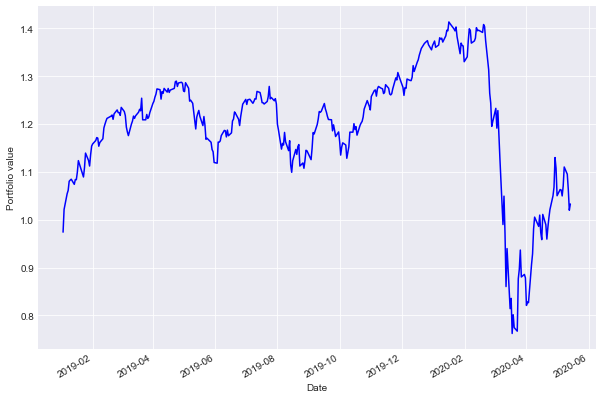

In [4]:
# Recupere os dados em stock_list a partir de janeiro de 2019
stock_data = data.loc['2019-1':,top_decile.index]
# Calcule a variação percentual diária dos preços
stock_data_pc = stock_data.pct_change()
# Crie um novo dataframe chamado portfolio
portfolio = pd.DataFrame()
# Calcule os retornos médios das ações
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Calcule os retornos cumumulativos do portfolio
portfolio['value'] = (portfolio+1).cumprod()
# Remova todas as linhas com valores nan
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

<a id='analyse_SMA'></a>
## Sinal de Trading baseado em Médias Móveis

1. ** Média móvel **: Calcule a média móvel simples de 10 dias do valor do portfólio.
2. ** Sinal de negociação **: Defina o sinal como 1 quando o valor da carteira for maior do que a média móvel simples.
3. ** Retornos da estratégia **: Multiplique os retornos da estratégia pelos retornos do portfólio



Os seguintes métodos / propriedades são usados

1. `numpy.where ()`: pode ser usado para gerar o sinal de negociação.

Sintaxe:
`` `python
import numpy as np
np.where (condition, value_if_true, value_if_false)
`` `

Parâmetros

* condition: condição para verificar
* value_if_true: valor se a condição for satisfeita
* value_if_false: valor se a condição não for satisfeita





2. `dropna`: para remover os valores ausentes
3. `rolling`: este método é usado para fornecer um cálculo consecutivo de um grupo de números. Aqui, a função rolling com um tamanho de janela de 10 períodos é usada para calcular a média móvel de 10 valores sequencialmente.


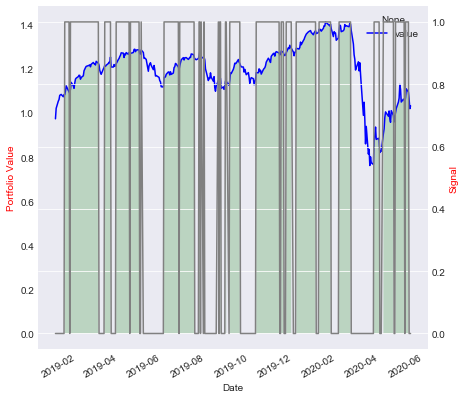

In [5]:
def get_strategy_returns_sma(portfolio):
    # Calcule a média móvel simples do período 10
    portfolio['sma10'] = portfolio.value.rolling(window=10).mean()
    # Crie um sinal de trading
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Calcule os retornos da estratégia
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plote os valores do sinal    
    portfolio['signal'].plot(secondary_y=True,figsize=(7,7),color='grey')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)    

1. A linha azul indica o valor do portfólio. <BR>
2. A linha cinza indica o sinal. O valor 1 indica que estamos comprados e 0 indica nenhuma posição. Consulte o eixo y à direita. <BR>
2. A área sombreada em verde representa o período em que estamos comprados nas ações do portfólio. <BR>

## Análise de desempenho: média móvel

**Retornos cumulativos da estratégia**

Usamos a função `cumprod ()` para calcular os retornos cumulativos da estratégia.

**Drawdowns**

O drawdown pode ser definido como a perda percentual do ponto histórico cumulativo mais alto. A fórmula para calculá-lo é:

Drawdown = (retornos cumulativos / ponto máximo) - 1

Para calcular o ponto máximo, podemos usar as funções `maximum ()` e `accumulate ()`. A biblioteca `matplotlib.pyplot` e a função` plot () `são usadas para plotar tanto os retornos quanto os drawdowns

O Sharpe ratio é 1.14 


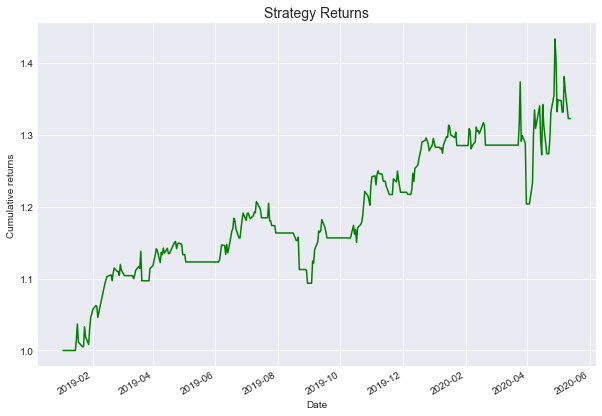

O drawdonw máximo é -12.36


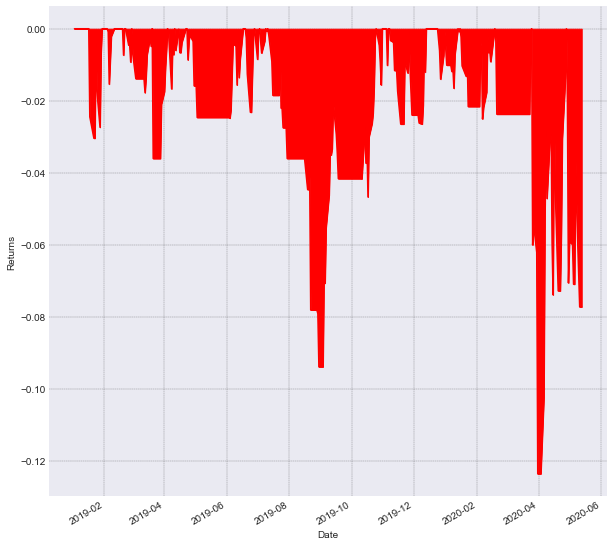

In [6]:
# Plote os retornos do portfolio
def plot_returns_dd(portfolio):
    # ----------- Índice de Sharpe ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('O Sharpe ratio é %.2f ' % sharpe_ratio)

    # ----------- Retornos Cumulatvos da Estratégia ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plote os retornos cumulativos da estratégia
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calcule o máximo de execução
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Certifique-se de que o valor nunca caia abaixo de 1
    running_max[running_max < 1] = 1
    # Calcule a porcentagem do drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('O drawdonw máximo é %.2f' % max_dd)
    # Plote drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio)    

<a id='analyse_breakout'> </a>
## Sinais de negociação e análise de desempenho: breakout

1. ** Breakout **: O valor máximo da carteira dos dois dias anteriores.
2. ** Sinal de negociação **: Crie um sinal de negociação que retorne o valor 1 quando o valor da carteira do dia atual for maior que o valor máximo calculado na etapa 1.
3. Calcule os retornos da estratégia.

O Sharpe ratio é 1.48 


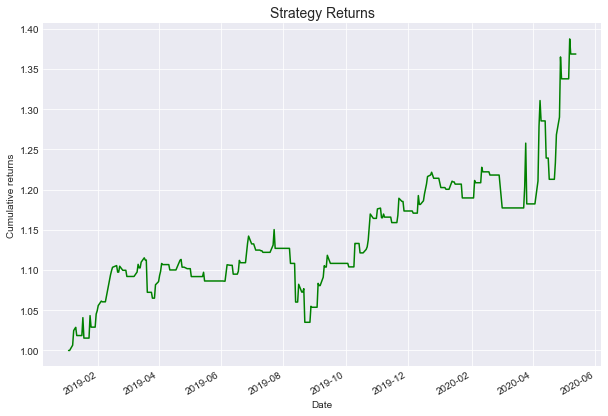

O drawdonw máximo é -10.02


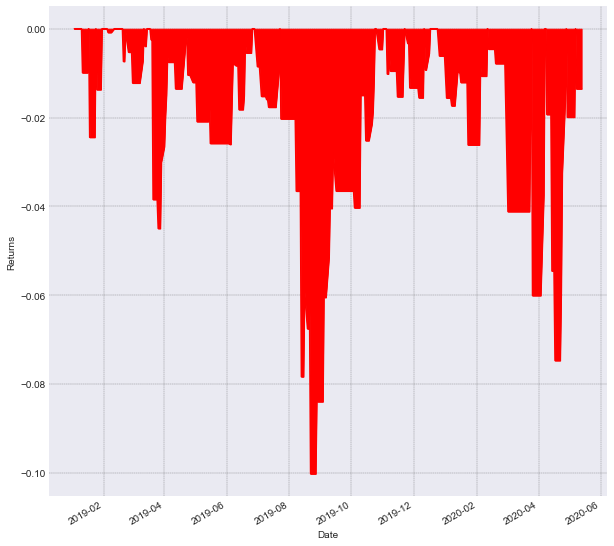

In [7]:
def get_strategy_returns_breakout(portfolio):
    # Calcule os valores do indicador de breakout
    portfolio['high'] = portfolio.value.rolling(window=3).max()
    # Crie um sinal de trading
    portfolio['signal'] = np.where(portfolio.value>=portfolio.high,1,0)
    # Calcule os retornos da estratégia
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
#plot_signal(portfolio)    
plot_returns_dd(portfolio)    

In [8]:
portfolio.tail(20)

,returns,value,sma10,signal,str_returns,cum_str_returns,high
Date,,,,,,,
2020-04-17,0.055069,1.011085,0.958694,1,-0.021317,1.212825,1.011085
2020-04-20,-0.021317,0.989532,0.974998,0,-0.000000,1.212825,1.011085
2020-04-21,-0.030364,0.959486,0.980257,0,0.000000,1.212825,1.011085
2020-04-22,0.025559,0.984010,0.985781,0,0.000000,1.212825,0.989532
2020-04-23,0.020342,1.004027,0.988097,1,0.017022,1.233470,1.004027
2020-04-24,0.017022,1.021117,0.989664,1,0.028163,1.268208,1.021117
2020-04-27,0.028163,1.049874,0.996048,1,0.017250,1.290084,1.049874
2020-04-28,0.017250,1.067984,1.001881,1,0.058026,1.364943,1.067984
2020-04-29,0.058026,1.129955,1.017538,1,-0.019920,1.337753,1.129955


Não apenas os retornos cumulativos da estratégia aumentaram, mas também o drawdonw máximo diminuiu para -10,02.
Mas podemos diminuir o rebaixamento máximo ainda mais. E se unirmos os dois indicadores?

<a id='analyse_SMA_breakout'> </a>
## Sinais de negociação e análise de desempenho: média móvel e breakout

Só tomaremos posição quando o sinal de retorno for de 1 pol. Pela média móvel e também pelo breakout.

O Sharpe ratio é 1.58 


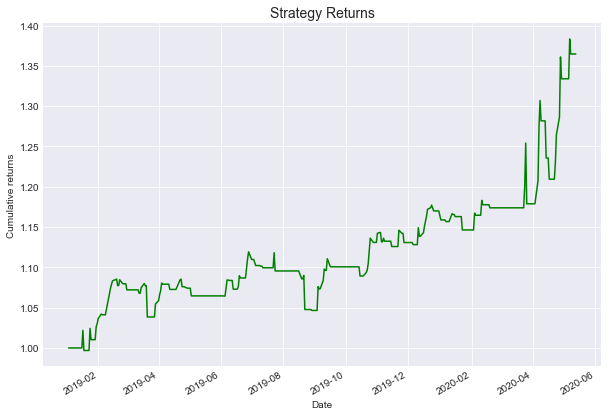

O drawdonw máximo é -7.47


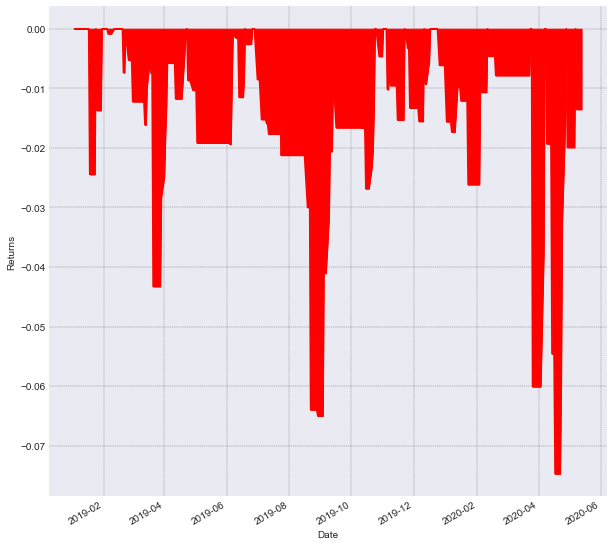

In [9]:
def get_strategy_returns_sma_breakout(portfolio):
    # Calcule a média móvel simples
    sma10 = portfolio.value > portfolio.value.rolling(window=10).mean()
    # Calcule os valores do indicador de breakout
    breakout = portfolio.value>=portfolio.value.rolling(window=3).max()

    # Crie um sinal de trading
    portfolio['signal'] = np.where(sma10 & breakout,1,0)

    # Calcule os retornos da estratégia
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_sma_breakout(portfolio)
#plot_signal(portfolio)    
plot_returns_dd(portfolio)    

<a id='Tweak'> </a>

## Conclusão

Você pode ajustar o código das seguintes maneiras
1. Experimente esses indicadores na carteira de ações do segundo decil superior
2. Use um número diferente de dias para SMA e para a estratégia de breakout e analise o desempenho
3. Aplique diferentes indicadores técnicos de negociação, como RSI, indicadores ADX

Na próxima unidade, você aprenderá programar por meio de exercícios interativos.